In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler 

In [22]:
df = pd.read_csv('one_dataset.csv')
df = df.drop(['NewspaperInserts', 'Website_Campaign '], axis=1)
print(df.head())
print(df.columns.tolist())
df['Radio '] = df['Radio '].fillna(df['Radio '].mean())
print(df.isnull().sum())

   NewVolSales  Base_Price  Radio   InStore  Discount          TV    Stout
0        19564   15.029276   245.0   15.452     0.000  101.780000  2.28342
1        19387   15.029276   314.0   16.388     0.000   76.734000  2.22134
2        23889   14.585093   324.0   62.692     0.050  131.590200  2.00604
3        20055   15.332887   298.0   16.573     0.000  119.627060  2.19897
4        20064   15.642632   279.0   41.504     0.045  103.438118  1.81860
['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'Discount', 'TV', 'Stout']
NewVolSales    0
Base_Price     0
Radio          0
InStore        0
Discount       0
TV             0
Stout          0
dtype: int64


In [24]:
x = df[['Base_Price', 'Radio ', 'InStore', 'Discount', 'TV', 'Stout']].values.reshape(-1,6)
y = df['NewVolSales']

sc = MinMaxScaler()
x_norm  = sc.fit_transform(x)
yn = y.min()
yx = y.max()
y_norm = (y-yn)/(yx - yn)

jb.dump(sc, 'one_scaler.pkl')

['one_scaler.pkl']

In [25]:
def sales(bp, r,ins, d, tv, st):
    model_path = 'one.keras'
    inp = np.array([[bp, r, ins, d, tv, st]])
    sc = jb.load('one_scaler.pkl')
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(6,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate= 0.001), loss='mean_squared_error')
        hist = model.fit(x_norm, y_norm, epochs=500)
        model.save('one.keras')
        lv= hist.history['loss']
        pred = model.predict(x_norm)

        plt.figure() 
        plt.plot(lv)
        plt.title('loss values')
        plt.grid(True)
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.show()
    return model.predict(inp)[0][0]*(yx - yn)+yn

Input to model:
[15.029276, 245.0, 15.452, 0.0, 101.78, 2.28342]
Epoch 1/500


c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1510  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0973 
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0757 
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0666 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0602 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0580 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0580 
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0517 
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0458
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0460 
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0395 
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0381 
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0314 
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0299 
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0291 
Epoch 16/500
4/4 ━━━━━━━━━━━━━

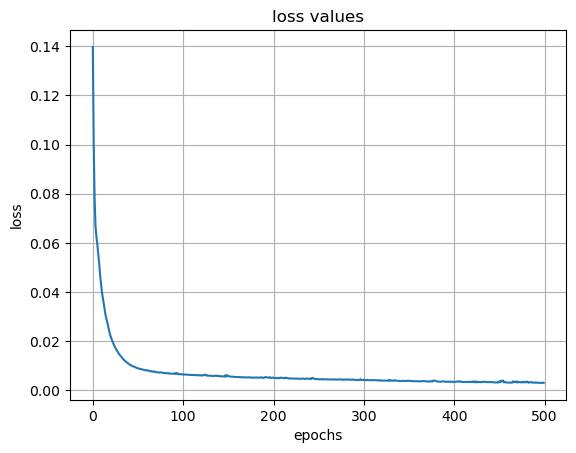

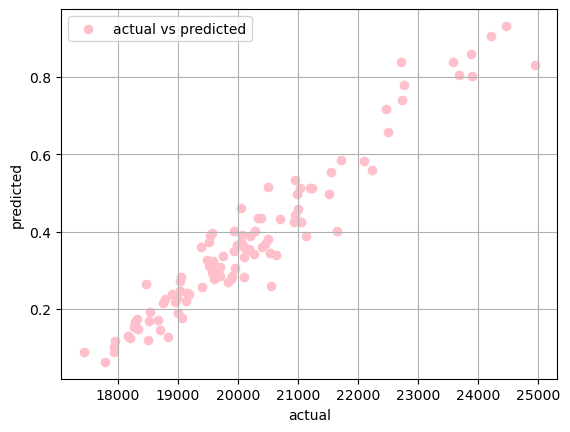

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
20403.810193359852


In [26]:
print("Input to model:")
print([15.029276, 245.0, 15.452, 0.0, 101.78, 2.28342])
print(sales(15.029276, 245.0, 15.452, 0.0, 101.78, 2.28342))
